Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [56]:
# your code here
import numpy
import scipy
import sklearn
from sklearn.datasets import load_wine
from scipy.cluster.vq import kmeans2, whiten
import pandas
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import sqlite3
import pandas as pd
from collections import Counter
pd.options.mode.chained_assignment = None
db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename) 
c = conn.cursor()

### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [57]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
d = {165316:{1835254:0, 296394:0, 404385:0, 448990:0},
     1835254:{165316:0, 296394:0, 404385:0, 448990:0},
     296394:{165316:0, 1835254:0, 404385:0, 448990:0},
     404385:{165316:0, 1835254:0, 296394:0, 448990:0},
     448990:{165316:0, 1835254:0, 296394:0, 404385:0}}
c.execute("SELECT visitorID, sequence FROM sequences WHERE visitorID IN (165316, 1835254, 296394, 404385, 448990)")
rows = c.fetchall()
data = {}
for i in rows:
    data[i[0]] = i[1].split('-')

for i in d:
    for j in d[i]:
        for k in range(len(data[i])):
            if data[i][k] != data[j][k]:
                d[i][j] += 1
print(d)

{165316: {1835254: 336, 296394: 318, 404385: 329, 448990: 318}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}, 296394: {165316: 318, 1835254: 282, 404385: 303, 448990: 0}, 404385: {165316: 329, 1835254: 298, 296394: 303, 448990: 303}, 448990: {165316: 318, 1835254: 282, 296394: 0, 404385: 303}}


### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

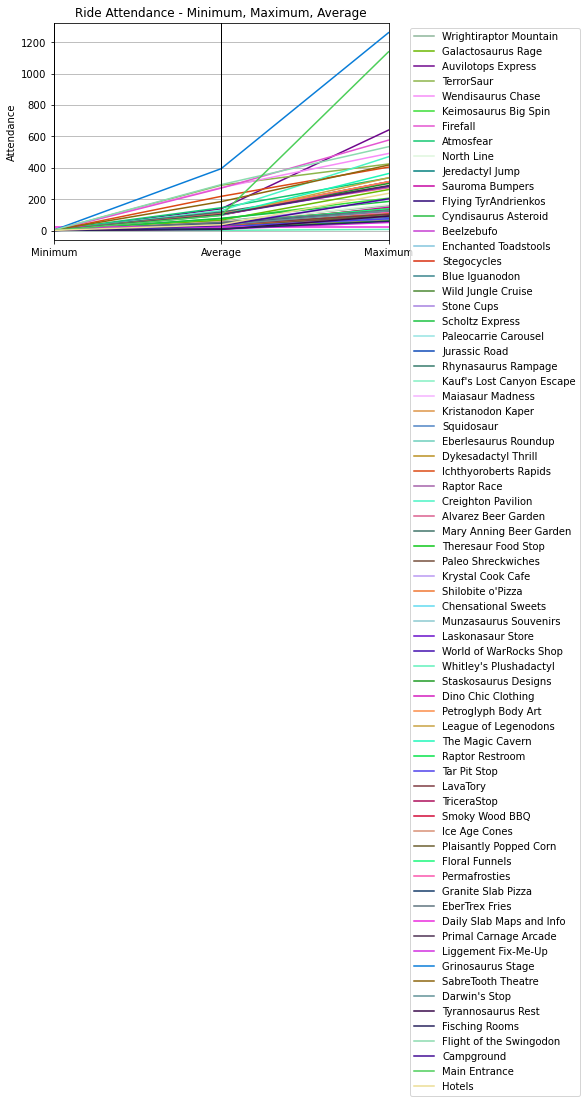

{'Wrightiraptor Mountain': {'min': 1, 'max': 158, 'avg': 60.88977955911824}, 'Galactosaurus Rage': {'min': 1, 'max': 261, 'avg': 66.57755102040817}, 'Auvilotops Express': {'min': 1, 'max': 640, 'avg': 138.72874493927125}, 'TerrorSaur': {'min': 2, 'max': 424, 'avg': 288.6909090909091}, 'Wendisaurus Chase': {'min': 5, 'max': 491, 'avg': 273.5853658536585}, 'Keimosaurus Big Spin': {'min': 2, 'max': 206, 'avg': 74.93535353535354}, 'Firefall': {'min': 1, 'max': 576, 'avg': 270.03614457831327}, 'Atmosfear': {'min': 5, 'max': 335, 'avg': 144.98605577689244}, 'North Line': {'min': 1, 'max': 166, 'avg': 53.19672131147541}, 'Jeredactyl Jump': {'min': 1, 'max': 112, 'avg': 26.783261802575108}, 'Sauroma Bumpers': {'min': 1, 'max': 148, 'avg': 30.146929824561404}, 'Flying TyrAndrienkos': {'min': 1, 'max': 98, 'avg': 24.585313174946005}, 'Cyndisaurus Asteroid': {'min': 1, 'max': 72, 'avg': 16.873303167420815}, 'Beelzebufo': {'min': 1, 'max': 93, 'avg': 18.23972602739726}, 'Enchanted Toadstools': {'m

In [58]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
attractions = pd.read_sql_query("SELECT AttractionID, Name FROM attraction;", conn)

sequences = pd.read_sql_query("SELECT visitorID, sequence FROM sequences;", conn)
sequences['sequence'] = sequences['sequence'].apply(lambda x: x.split('-'))

names = {}
rideSeq = {}

for i, row in attractions.iterrows():
    names[row['AttractionID']] = row['Name']
    rideSeq[row['AttractionID']] = Counter()

for i, row in sequences.iterrows():
    for ind, j in enumerate(row['sequence']):
        if int(j) in rideSeq:
            rideSeq[int(j)][ind] += 1

df, minn, maxx, avg = pd.DataFrame(), [], [], []
for k, v in rideSeq.items():
    minn.append(min(rideSeq[k].values()))
    maxx.append(max(rideSeq[k].values()))
    avg.append(sum(rideSeq[k].values())/len(rideSeq[k].values()))

df['Rides'] = names.values()
df['Minimum'] = minn
df['Average'] = avg
df['Maximum'] = maxx
pd.plotting.parallel_coordinates(df, 'Rides')
plt.title('Ride Attendance - Minimum, Maximum, Average')
plt.ylabel('Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ans = {}
for i in df.iterrows():
    ans[i[1]['Rides']] = {'min': i[1]['Minimum'], 'max': i[1]['Maximum'], 'avg': i[1]['Average']}
print(ans)

### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

In [ ]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here
